In [115]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os


load_dotenv()
ow_key = os.getenv('ow_key')

In [116]:
df_ip = pd.read_csv('data/inverter_plants.csv')

# Fix NaN plant_address values to 'Gazipur' for consistency
df_ip['plant_address'] = df_ip['plant_address'].fillna('Gazipur')

df_ip['plant_number'] = df_ip.index + 1

df = df_ip[['plant_id', 'plant_name', 'plant_address', 'plant_capacity', 'plant_number']]

df

,plant_id,plant_name,plant_address,plant_capacity,plant_number
0,15848107,DGL (GGI),Gazipur,1280.40,1
1,1535729,SOLshare LM Tower,Dhaka,4.25,2
2,1535728,BHC,Dhaka,15.66,3
3,11811249,ACCL (GGI),Gazipur,285.12,4
4,11605154,NAL (GGI),Gazipur,227.04,5
5,12018942,ACML (GGI),Gazipur,525.36,6
6,11701955,CAL (GGI),Gazipur,522.72,7
7,11838318,HKL (GGI),Gazipur,269.28,8
8,1535726,Unilever Sales Depot Bogura,Bogura,39.60,9
9,9977156,KCL (SOLshare),Narayangang,249.20,10


In [117]:
df_hour = pd.read_csv('data/inverter_hourly_generation_logs.csv')
df_5m = pd.read_csv('data/inverter_five_minutes_generation_logs.csv')

df_hour = df_hour.merge(df, on='plant_id', how='left')
df_5m = df_5m.merge(df, on='plant_id', how='left')

plant_daylist = df_hour['plant_name'].unique().tolist()
adress_daylist = df_hour['plant_address'].unique().tolist()

print('df_hour'), df_hour.shape, df_hour['generation_date'].min(), df_hour['generation_date'].max(), adress_daylist, df_hour['generation_amount'].mean()

df_hour


(None,
 (550721, 7),
 '2023-01-23 09:00:00 UTC',
 '2025-02-04 15:55:00 UTC',
 ['Bogura', 'Narayangang', 'Rajshahi', 'Gazipur', nan],
 2320.597498691277)

In [118]:
print('df_5m'), df_5m.shape, df_5m['generation_date'].min(), df_5m['generation_date'].max(), adress_daylist, df_5m['generation_amount'].mean()

df_5m


(None,
 (849773, 7),
 '2023-01-23 09:00:00 UTC',
 '2025-10-22 15:55:00 UTC',
 ['Bogura', 'Narayangang', 'Rajshahi', 'Gazipur', nan],
 2703.8783414403256)

In [119]:
# The original code tries to subtract two DataFrames, which is not meaningful and causes an error.
# If you want to see what rows are present in df_5m but not in df_hour, use merge with indicator:
df_diff = df_5m.merge(df_hour, how='outer', indicator=True)
df_5m_only = df_diff[df_diff['_merge'] == 'left_only']
df_5m_only['plant_name'].value_counts()

CAL (GGI)     65499
NAL (GGI)     60896
ACML (GGI)    59760
HKL (GGI)     58420
ACCL (GGI)    37261
DGL (GGI)     17216
Name: plant_name, dtype: int64

In [120]:
df_hour = df_hour[df_hour['generation_amount'] != 0]
df_hour = df_hour[df_hour['plant_address'] == 'Gazipur']
df_hour['generation_amount'] = df_hour['generation_amount'] / 1000
df_hour.tail(50)

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_capacity,plant_number
447182,11838318,2024-01-05 07:25:00 UTC,8.770990,HKL (GGI),Gazipur,269.28,8.0
447183,11838318,2024-01-05 07:30:00 UTC,9.237665,HKL (GGI),Gazipur,269.28,8.0
447184,11838318,2024-01-05 07:35:00 UTC,10.269668,HKL (GGI),Gazipur,269.28,8.0
447185,11838318,2024-01-05 07:40:00 UTC,10.072261,HKL (GGI),Gazipur,269.28,8.0
447186,11838318,2024-01-05 07:45:00 UTC,5.959393,HKL (GGI),Gazipur,269.28,8.0
447187,11838318,2024-01-05 07:50:00 UTC,5.445238,HKL (GGI),Gazipur,269.28,8.0
447188,11838318,2024-01-05 07:55:00 UTC,5.419956,HKL (GGI),Gazipur,269.28,8.0
447189,11838318,2024-01-05 08:00:00 UTC,5.393661,HKL (GGI),Gazipur,269.28,8.0
447190,11838318,2024-01-05 08:05:00 UTC,9.494964,HKL (GGI),Gazipur,269.28,8.0
447191,11838318,2024-01-05 08:10:00 UTC,9.718028,HKL (GGI),Gazipur,269.28,8.0


In [121]:
df_hour.head(50)

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_capacity,plant_number
27412,11605154,2024-01-07 00:50:00 UTC,0.001401,NAL (GGI),Gazipur,227.04,5.0
27413,11605154,2024-01-07 00:55:00 UTC,0.029734,NAL (GGI),Gazipur,227.04,5.0
27414,11605154,2024-01-07 01:00:00 UTC,0.064105,NAL (GGI),Gazipur,227.04,5.0
27415,11605154,2024-01-07 01:05:00 UTC,0.094341,NAL (GGI),Gazipur,227.04,5.0
27416,11605154,2024-01-07 01:10:00 UTC,0.138471,NAL (GGI),Gazipur,227.04,5.0
27417,11605154,2024-01-07 01:15:00 UTC,0.191969,NAL (GGI),Gazipur,227.04,5.0
27418,11605154,2024-01-07 01:20:00 UTC,0.239769,NAL (GGI),Gazipur,227.04,5.0
27419,11605154,2024-01-07 01:25:00 UTC,0.250435,NAL (GGI),Gazipur,227.04,5.0
27420,11605154,2024-01-07 01:30:00 UTC,0.378190,NAL (GGI),Gazipur,227.04,5.0
27421,11605154,2024-01-07 01:35:00 UTC,0.440857,NAL (GGI),Gazipur,227.04,5.0


In [122]:
df_hour.shape

(218458, 7)

In [123]:
df_hour[df_hour['generation_date'] == '2024-04-24 11:15:00 UTC'].sort_values('plant_number')

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_capacity,plant_number
81209,11605154,2024-04-24 11:15:00 UTC,0.508048,NAL (GGI),Gazipur,227.04,5.0
323175,12018942,2024-04-24 11:15:00 UTC,0.211624,ACML (GGI),Gazipur,525.36,6.0
133666,11701955,2024-04-24 11:15:00 UTC,2.149834,CAL (GGI),Gazipur,522.72,7.0
290503,11838318,2024-04-24 11:15:00 UTC,2.640198,HKL (GGI),Gazipur,269.28,8.0


In [124]:
df_5m[df_5m['generation_date'] == '2024-04-24 11:25:00 UTC'].sort_values('plant_number')

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_capacity,plant_number
301347,11605154,2024-04-24 11:25:00 UTC,402.908189,NAL (GGI),Gazipur,227.04,5.0
626213,12018942,2024-04-24 11:25:00 UTC,210.735089,ACML (GGI),Gazipur,525.36,6.0
790389,11701955,2024-04-24 11:25:00 UTC,1685.450550,CAL (GGI),Gazipur,522.72,7.0
559855,11838318,2024-04-24 11:25:00 UTC,1937.669039,HKL (GGI),Gazipur,269.28,8.0
514787,9977156,2024-04-24 11:25:00 UTC,1299.312983,KCL (SOLshare),Narayangang,249.20,10.0


In [125]:
df_5m[df_5m['generation_date'] == '2024-04-24 11:00:00 UTC'].sort_values('plant_number')

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_capacity,plant_number
515108,11605154,2024-04-24 11:00:00 UTC,1819.013770,NAL (GGI),Gazipur,227.04,5.0
504833,12018942,2024-04-24 11:00:00 UTC,1366.106089,ACML (GGI),Gazipur,525.36,6.0
416775,11701955,2024-04-24 11:00:00 UTC,2875.168889,CAL (GGI),Gazipur,522.72,7.0
615129,11838318,2024-04-24 11:00:00 UTC,4225.966354,HKL (GGI),Gazipur,269.28,8.0
416242,9977156,2024-04-24 11:00:00 UTC,2372.841817,KCL (SOLshare),Narayangang,249.20,10.0
759283,1535725,2024-04-24 11:00:00 UTC,6.360000,Faruk Auto Garage Rajshahi,Rajshahi,18.53,11.0


In [126]:
# First, ensure 'generation_date' is a datetime and set as index for resampling by hour
df_5m['date'] = pd.to_datetime(df_5m['generation_date'])
df_5m_resampled = df_5m.set_index('date').resample('H')['generation_amount'].sum()

In [127]:
df_5m_resampled

date
2023-01-23 09:00:00+00:00       26.340000
2023-01-23 10:00:00+00:00        0.000000
2023-01-23 11:00:00+00:00        0.000000
2023-01-23 12:00:00+00:00        0.000000
2023-01-23 13:00:00+00:00        0.000000
                                 ...     
2025-10-22 11:00:00+00:00    13579.253125
2025-10-22 12:00:00+00:00        0.000000
2025-10-22 13:00:00+00:00        0.000000
2025-10-22 14:00:00+00:00        0.000000
2025-10-22 15:00:00+00:00        0.000000
Freq: H, Name: generation_amount, Length: 24079, dtype: float64

In [128]:
# FIND data where the date is not a exact hour.
df_generation_dt = pd.to_datetime(df_hour['generation_date'])
df_hour_non_round = df_hour[
    (df_generation_dt.dt.minute != 0) | (df_generation_dt.dt.second != 0)
]

df_hour_non_round[['generation_date']]

,generation_date
27412,2024-01-07 00:50:00 UTC
27413,2024-01-07 00:55:00 UTC
27415,2024-01-07 01:05:00 UTC
27416,2024-01-07 01:10:00 UTC
27417,2024-01-07 01:15:00 UTC
...,...
447227,2024-01-05 11:10:00 UTC
447228,2024-01-05 11:15:00 UTC
447229,2024-01-05 11:20:00 UTC
447230,2024-01-05 11:25:00 UTC


In [129]:
df = pd.read_csv('data/inverter_hourly_generation_logs.csv')
df = df[df['plant_id'] != 12018942]
df.head(50)

,plant_id,generation_date,generation_amount
0,1535726,2024-01-21 11:00:00 UTC,0.51
1,1535726,2024-01-22 08:00:00 UTC,12.27
2,1535726,2024-01-22 06:00:00 UTC,9.10
3,1535726,2024-01-22 07:00:00 UTC,12.47
4,1535726,2024-01-22 04:00:00 UTC,4.77
5,1535726,2024-01-22 05:00:00 UTC,6.29
6,1535726,2024-01-22 03:00:00 UTC,3.06
7,1535726,2024-01-22 01:00:00 UTC,0.32
8,1535726,2024-01-22 02:00:00 UTC,1.80
9,1535726,2024-01-23 02:00:00 UTC,1.88


In [130]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218458 entries, 27412 to 447231
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   plant_id           218458 non-null  int64  
 1   generation_date    218458 non-null  object 
 2   generation_amount  218458 non-null  float64
 3   plant_name         218458 non-null  object 
 4   plant_address      218458 non-null  object 
 5   plant_capacity     218458 non-null  float64
 6   plant_number       218458 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 13.3+ MB


In [131]:
# Remove " , " from the value in generation_amount :
df_hour['generation_amount'] = df_hour['generation_amount'].astype(str).str.replace(',', '')

# Transform "generation_amount" value to float
df_hour['generation_amount'] = df_hour['generation_amount'].astype(float)

df_hour['generation_date'] = pd.to_datetime(df_hour['generation_date'])
df_hour['date'] = df_hour['generation_date'].dt.date

In [132]:
df_gazipur = df_hour[df_hour['plant_address'] == 'Gazipur']
gazipur_plant_list = df_gazipur['plant_name'].unique().tolist()
df_gazipur = df_gazipur[['date', 'generation_amount', 'plant_capacity', 'plant_name']]
df_gazipur['date'].min(), df_gazipur['date'].max(), (df_gazipur['date'].max() - df_gazipur['date'].min())


(datetime.date(2023, 12, 2),
 datetime.date(2025, 2, 4),
 datetime.timedelta(days=430))

In [148]:
for i in gazipur_plant_list:
    df_temp = df_gazipur[df_gazipur['plant_name'] == i]

    start = df_temp['date'].min()
    end = df_temp['date'].max()

    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)
    days = (end_dt - start_dt).days
    data_point = len(df_temp)

    print(i)
    print(f'days = {days}')
    print(f'hour = {days * 24 * 12}')
    print(f'data_point = {data_point}')
    print(start)
    print(end)
    print('\n')


NAL (GGI)
days = 430
hour = 123840
data_point = 1217839
2023-12-02
2025-02-04


CAL (GGI)
days = 430
hour = 123840
data_point = 1007208
2023-12-02
2025-02-04


ACCL (GGI)
days = 428
hour = 123264
data_point = 972715
2023-12-04
2025-02-04


HKL (GGI)
days = 415
hour = 119520
data_point = 1282437
2023-12-17
2025-02-04


ACML (GGI)
days = 357
hour = 102816
data_point = 850943
2024-02-13
2025-02-04




In [149]:
df_hour

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_capacity,plant_number,date
27412,11605154,2024-01-07 00:50:00+00:00,0.001401,NAL (GGI),Gazipur,227.04,5.0,2024-01-07
27413,11605154,2024-01-07 00:55:00+00:00,0.029734,NAL (GGI),Gazipur,227.04,5.0,2024-01-07
27414,11605154,2024-01-07 01:00:00+00:00,0.064105,NAL (GGI),Gazipur,227.04,5.0,2024-01-07
27415,11605154,2024-01-07 01:05:00+00:00,0.094341,NAL (GGI),Gazipur,227.04,5.0,2024-01-07
27416,11605154,2024-01-07 01:10:00+00:00,0.138471,NAL (GGI),Gazipur,227.04,5.0,2024-01-07
...,...,...,...,...,...,...,...,...
447227,11838318,2024-01-05 11:10:00+00:00,0.227617,HKL (GGI),Gazipur,269.28,8.0,2024-01-05
447228,11838318,2024-01-05 11:15:00+00:00,0.150940,HKL (GGI),Gazipur,269.28,8.0,2024-01-05
447229,11838318,2024-01-05 11:20:00+00:00,0.083828,HKL (GGI),Gazipur,269.28,8.0,2024-01-05
447230,11838318,2024-01-05 11:25:00+00:00,0.030127,HKL (GGI),Gazipur,269.28,8.0,2024-01-05


In [134]:
df_hour.head()

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_capacity,plant_number,date
27412,11605154,2024-01-07 00:50:00+00:00,0.001401,NAL (GGI),Gazipur,227.04,5.0,2024-01-07
27413,11605154,2024-01-07 00:55:00+00:00,0.029734,NAL (GGI),Gazipur,227.04,5.0,2024-01-07
27414,11605154,2024-01-07 01:00:00+00:00,0.064105,NAL (GGI),Gazipur,227.04,5.0,2024-01-07
27415,11605154,2024-01-07 01:05:00+00:00,0.094341,NAL (GGI),Gazipur,227.04,5.0,2024-01-07
27416,11605154,2024-01-07 01:10:00+00:00,0.138471,NAL (GGI),Gazipur,227.04,5.0,2024-01-07


In [135]:
df_gazi_weather = pd.read_csv('open_data/gazipur_weather.csv')

df_gazi_weather = df_gazi_weather[['dt_iso', 'temp', 'visibility', 'temp_min', 'temp_max', 'rain_1h', 'clouds_all']]

df_gazi_weather['date'] = pd.to_datetime(df_gazi_weather['dt_iso'].str.replace(' +0000 UTC', '', regex=False), errors='coerce').dt.date

# df_gazi_weather = df_gazi_weather.groupby('date').agg({
#     'temp': 'mean',
#     'temp_min': 'min',
#     'temp_max': 'max',
#     'rain_1h': 'sum',
#     'clouds_all': 'sum'
# })

df_gazipur = df_gazipur.merge(df_gazi_weather, on='date', how='left')
df_gazipur

,date,generation_amount,plant_capacity,plant_name,dt_iso,temp,visibility,temp_min,temp_max,rain_1h,clouds_all
0,2024-01-07,0.001401,227.04,NAL (GGI),2024-01-07 00:00:00 +0000 UTC,14.42,NaN,14.11,14.79,NaN,6
1,2024-01-07,0.001401,227.04,NAL (GGI),2024-01-07 01:00:00 +0000 UTC,14.35,NaN,14.02,14.70,NaN,15
2,2024-01-07,0.001401,227.04,NAL (GGI),2024-01-07 02:00:00 +0000 UTC,17.28,1200.0,16.98,17.60,NaN,37
3,2024-01-07,0.001401,227.04,NAL (GGI),2024-01-07 03:00:00 +0000 UTC,17.62,NaN,17.56,17.71,NaN,19
4,2024-01-07,0.001401,227.04,NAL (GGI),2024-01-07 04:00:00 +0000 UTC,17.83,NaN,17.74,17.89,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...
5331137,2024-01-05,0.001999,269.28,HKL (GGI),2024-01-05 19:00:00 +0000 UTC,14.97,NaN,14.87,15.08,NaN,0
5331138,2024-01-05,0.001999,269.28,HKL (GGI),2024-01-05 20:00:00 +0000 UTC,14.44,NaN,14.27,14.68,NaN,0
5331139,2024-01-05,0.001999,269.28,HKL (GGI),2024-01-05 21:00:00 +0000 UTC,14.35,NaN,14.18,14.59,NaN,0
5331140,2024-01-05,0.001999,269.28,HKL (GGI),2024-01-05 22:00:00 +0000 UTC,13.26,NaN,13.01,13.51,NaN,0


In [136]:
ACCL_df = df_gazipur[df_gazipur['plant_name'] == 'ACCL (GGI)']
ACML_df = df_gazipur[df_gazipur['plant_name'] == 'ACML (GGI)']
CAL_df = df_gazipur[df_gazipur['plant_name'] == 'CAL (GGI)']
HKL_df = df_gazipur[df_gazipur['plant_name'] == 'HKL (GGI)']
NAL_df = df_gazipur[df_gazipur['plant_name'] == 'NAL (GGI)']

In [137]:
# Fix for duplicate 'date' issue before reindexing

# Remove duplicate entries for each date, keeping the first occurrence
ACCL_df = ACCL_df.sort_values('date').drop_duplicates(subset='date', keep='first')

# Create a full date range
full_dates = pd.date_range(start=ACCL_df['date'].min(), end=ACCL_df['date'].max(), freq='D')

# Set date as index and reindex to include all dates in the range
ACCL_df = ACCL_df.set_index('date').reindex(full_dates)

# Fill constant columns
ACCL_df['plant_capacity'] = ACCL_df['plant_capacity'].iloc[0]
ACCL_df['plant_name'] = ACCL_df['plant_name'].iloc[0]

# Prepare final dataframe
ACCL_df = ACCL_df.rename_axis('date').reset_index()

In [138]:
# Fix for duplicate 'date' issue before reindexing

# Remove duplicate entries for each date, keeping the first occurrence
ACML_df = ACML_df.sort_values('date').drop_duplicates(subset='date', keep='first')

# Create a full date range
full_dates = pd.date_range(start=ACML_df['date'].min(), end=ACML_df['date'].max(), freq='D')

# Set date as index and reindex to include all dates in the range
ACML_df = ACML_df.set_index('date').reindex(full_dates)

# Fill constant columns
ACML_df['plant_capacity'] = ACML_df['plant_capacity'].iloc[0]
ACML_df['plant_name'] = ACML_df['plant_name'].iloc[0]

# Prepare final dataframe
ACML_df = ACML_df.rename_axis('date').reset_index()

In [139]:
# Fix for duplicate 'date' issue before reindexing

# Remove duplicate entries for each date, keeping the first occurrence
CAL_df = CAL_df.sort_values('date').drop_duplicates(subset='date', keep='first')

# Create a full date range
full_dates = pd.date_range(start=CAL_df['date'].min(), end=CAL_df['date'].max(), freq='D')

# Set date as index and reindex to include all dates in the range
CAL_df = CAL_df.set_index('date').reindex(full_dates)

# Fill constant columns
CAL_df['plant_capacity'] = CAL_df['plant_capacity'].iloc[0]
CAL_df['plant_name'] = CAL_df['plant_name'].iloc[0]

# Prepare final dataframe
CAL_df = CAL_df.rename_axis('date').reset_index()

In [140]:
# Fix for duplicate 'date' issue before reindexing

# Remove duplicate entries for each date, keeping the first occurrence
HKL_df = HKL_df.sort_values('date').drop_duplicates(subset='date', keep='first')

# Create a full date range
full_dates = pd.date_range(start=HKL_df['date'].min(), end=HKL_df['date'].max(), freq='D')

# Set date as index and reindex to include all dates in the range
HKL_df = HKL_df.set_index('date').reindex(full_dates)

# Fill constant columns
HKL_df['plant_capacity'] = HKL_df['plant_capacity'].iloc[0]
HKL_df['plant_name'] = HKL_df['plant_name'].iloc[0]

# Prepare final dataframe
HKL_df = HKL_df.rename_axis('date').reset_index()

In [141]:
# Fix for duplicate 'date' issue before reindexing

# Remove duplicate entries for each date, keeping the first occurrence
NAL_df = NAL_df.sort_values('date').drop_duplicates(subset='date', keep='first')

# Create a full date range
full_dates = pd.date_range(start=NAL_df['date'].min(), end=NAL_df['date'].max(), freq='D')

# Set date as index and reindex to include all dates in the range
NAL_df = NAL_df.set_index('date').reindex(full_dates)

# Fill constant columns
NAL_df['plant_capacity'] = NAL_df['plant_capacity'].iloc[0]
NAL_df['plant_name'] = NAL_df['plant_name'].iloc[0]

# Prepare final dataframe
NAL_df = NAL_df.rename_axis('date').reset_index()

In [142]:
NAL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               431 non-null    datetime64[ns]
 1   generation_amount  376 non-null    float64       
 2   plant_capacity     431 non-null    float64       
 3   plant_name         431 non-null    object        
 4   dt_iso             376 non-null    object        
 5   temp               376 non-null    float64       
 6   visibility         248 non-null    float64       
 7   temp_min           376 non-null    float64       
 8   temp_max           376 non-null    float64       
 9   rain_1h            28 non-null     float64       
 10  clouds_all         376 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 37.2+ KB


In [143]:
NAL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               431 non-null    datetime64[ns]
 1   generation_amount  376 non-null    float64       
 2   plant_capacity     431 non-null    float64       
 3   plant_name         431 non-null    object        
 4   dt_iso             376 non-null    object        
 5   temp               376 non-null    float64       
 6   visibility         248 non-null    float64       
 7   temp_min           376 non-null    float64       
 8   temp_max           376 non-null    float64       
 9   rain_1h            28 non-null     float64       
 10  clouds_all         376 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 37.2+ KB


In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

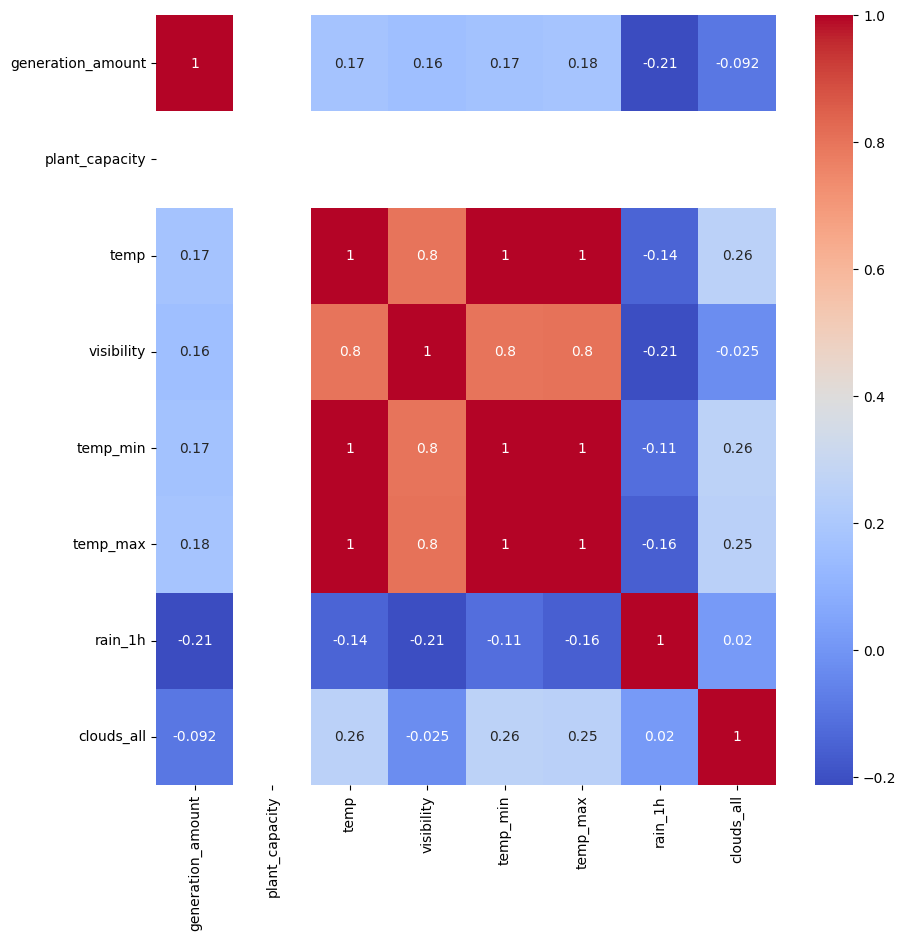

In [145]:
plt.figure(figsize = (10, 10))

sns.heatmap(
    NAL_df.corr(),
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {"size": 10}
)

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
drop_cols = ['date', 'plant_name', 'generation_amount']

# Drop rows with NaN values only in the features or the target column (not across all columns)
NAL_df = NAL_df.dropna(subset=['generation_amount', 'plant_capacity', 'temp', 'temp_min', 'temp_max', 'rain_1h', 'clouds_all'])

# Prepare X and y
X = NAL_df.drop(columns=drop_cols)
y = NAL_df['generation_amount']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', LinearRegression())  # Linear Regression model
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Make predictions on test data
y_pred = pipeline.predict(X_test)

# Evaluate (optional, but useful to see performance)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Predictions:", y_pred)

ValueError: could not convert string to float: '2024-09-14 22:00:00 +0000 UTC'

In [ ]:
df = pd.read_csv('data/inverter_hourly_generation_logs.csv')
df = df.merge(df_ip, on='plant_id', how='left')
df.sort_values('plant_number', inplace=True)
df = df[df['generation_amount'] != 0]
df


,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_type,plant_capacity,system_type,inverter_provider,status,plant_number
216945,11811249,2024-10-13 00:05:00 UTC,74.095350,ACCL (GGI),Gazipur,CommercialRoofTop,285.12,NaN,NaN,active,4.0
274108,11811249,2024-10-30 06:45:00 UTC,5240.472389,ACCL (GGI),Gazipur,CommercialRoofTop,285.12,NaN,NaN,active,4.0
274107,11811249,2024-10-30 06:40:00 UTC,4494.701400,ACCL (GGI),Gazipur,CommercialRoofTop,285.12,NaN,NaN,active,4.0
274106,11811249,2024-10-30 06:35:00 UTC,5304.516261,ACCL (GGI),Gazipur,CommercialRoofTop,285.12,NaN,NaN,active,4.0
274105,11811249,2024-10-30 06:30:00 UTC,6744.065211,ACCL (GGI),Gazipur,CommercialRoofTop,285.12,NaN,NaN,active,4.0
...,...,...,...,...,...,...,...,...,...,...,...
432169,12036047,2024-03-25 10:30:00 UTC,150.648050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432170,12036047,2024-03-25 10:45:00 UTC,1478.991500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432171,12036047,2024-03-25 10:55:00 UTC,826.336000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432172,12036047,2024-03-25 11:00:00 UTC,770.552739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[df['generation_amount'] != 6.36]
df.head(50)
df = df[df['generation_amount'] < df['plant_capacity']]

In [ ]:
df

,plant_id,generation_date,generation_amount,plant_name,plant_address,plant_type,plant_capacity,system_type,inverter_provider,status,plant_number
